Το πρόβλημα που θα επιλύσετε σε αυτήν την εργασία είναι ένα πρόβλημα ταξινόμησης όγκων από κύτταρα μαστών σε καλοήθεις ή μη όγκους.  Θα χρησιμοποιήσετε το Breast Cancer Wisconsin (Diagnostic) Dataset του UCI Machine Learning Repository.

 Μπορείτε να βρείτε λεπτομέρειες [εδώ](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). Θα πρέπει να χρησιμοποιήσετε όλα τα χαρακτηριστικά για να κάνετε την ταξινόμηση.

Για οποιοδήποτε βήμα δεν δίνεται συγκεκριμένη οδηγία (επιλογή παραμέτρων, προεπεξεργασία δεδομένων, κ.λπ.) έχετε την ελευθερία επιλογής, παραθέτοντας μια σύντομη εξήγηση της επιλογής σας.

Θα πρέπει να ανεβάσετε το notebook σας στο helios στο σημείο που θα σας υποδειχθεί. Πριν το ανεβάσετε, βεβαιωθείτε ότι έχετε τρέξει όλα τα κελιά κώδικα που υπάρχουν στο notebook σας.

Καλή επιτυχία!


In [17]:
# Φόρτωση του Συνόλου Δεδομένων
%pip install seaborn
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

# Φόρτωση του συνόλου δεδομένων
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()


 1. Xρησιμοποιήστε την κατάλληλη συνάρτηση από τη βιβλιοθήκη pandas για να διαβάσετε το dataset και να το 'φορτώσετε' σε dataframe.
-  Τα δεδομένα περιλαμβάνουν τα χαρακτηριστικά και μία κατηγορική μεταβλητή στόχου (target).
- Η μεταβλητή 'target' αντιπροσωπεύει κακοήθεια ή μη.

In [19]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

#### Προεπεξεργασία Δεδομένων

2. Εκτυπώστε τις πρώτες γραμμές του συνόλου δεδομένων

In [20]:
# --- START CODE

# Εμφάνισε τις πρώτες 4 γραμμές του dataframe
print( df.head(4) )

# --- END CODE

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2        

3. Εξετάστε το είδος των τιμών για κάθε χαρακτηριστικό του συνόλου δεδομένων

In [21]:
# --- START CODE

print( df.dtypes )

# --- END CODE

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

4. Ελέγξτε αν υπάρχουν κενές τιμές ανά στήλη.

In [22]:
# --- START CODE

# Αρχικά ελέγχουμε αν υπάρχουν κενά strings "" και αν υπάρχουν τα αντικαθηστούμε με ΝαΝ
for i in cancer.feature_names:
    df[i].replace("", np.nan, inplace=True)

# Η .isna() ελέγχει αν υπάρχει NaN τιμή
# Τυπώνουμε πόσες φορές υπάρχει τιμή  ΝαΝ σε κάθε στίλη
print(df.isna().sum())
# print(df.info())

# --- END CODE

<ipython-input-22-be8662d21a82>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace("", np.nan, inplace=True)


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


Υπάρχουν κενές τιμές; Σε ποιες στήλες;
> Δεν υπάρχουν κενές τιμές στο dataset



4.1 Αν υπάρχουν κενές τιμές, γράψτε κώδικα  που να συμπληρώνει κατάλληλα τις κενές τιμές, ανάλογα με το χαρακτηριστικό που αφορούν.

In [23]:
# --- START CODE

# --- END CODE

#### Ανάλυση Δεδομένων
5. Αναπαραστήστε την κατανομή της εξαρτημένης μεταβλητής (target).

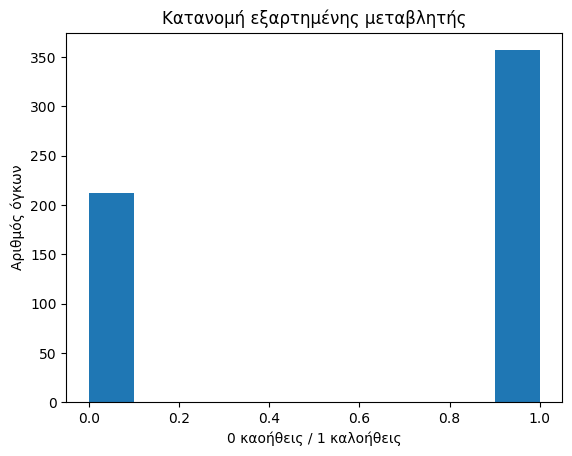

In [24]:
# --- START CODE
plt.hist(df['target'])
plt.xlabel('0 καοήθεις / 1 καλοήθεις')
plt.ylabel('Αριθμός όγκων')
plt.title("Κατανομή εξαρτημένης μεταβλητής")
plt.show()
#--- END CODE

Τι παρατηρείτε στην κατανομή αυτήν; Μπορείτε να προτείνετε κάποια υλοποίηση, σε αυτό το σημείο, που θα βοηθούσε στην εκπαίδευση;


> Παρατειρούμε ότι το dataset δεν είναι ισορροπημένο. Έτσι μπορεί να υπάρχει προκατάλυψη στους αλγόριθμους ταξινόμησης ώς προς την κατηγορία 1 (καλοήθης). Μια λύση θα ήταν να διαγράψουμε τυχαία δείγματα από την κατηγορία 1 (καλοήθης), ώστε να έχουμε ίσες ποσότητες (Downsampling). Όμως υπάρχει το μειονεκτήματα ότι χάνουμε πληροφορία. Εναλακτικά μπορούμε να χτησιμοποιήσουμε κάποιο βάρος στην μειωνεκτική κλάση (Βολικό για logistic regression). Καθώς για την εκπαίδευση θα χρησιμοποιήσουμε τα μοντέλα για κατηγοριοποίηση:
k-Nearest Neighbors, GaussianNB και Logistic Regression θα κάνουμε Downsampling που είναι απλό και γρήγορο.



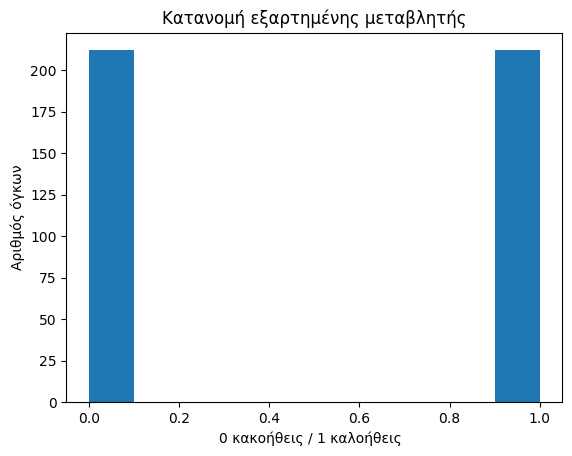

In [25]:
# --- START CODE
from sklearn.utils import resample

df_majority = df[df['target'] == 1] # καλοήθης
df_minority= df[df['target'] == 0] # κακοήθης

# Downsampling το δείγμα σε πλειοψηφία (καλοήθης)
df_maj_downsampled = resample(df_majority,n_samples=len(df_minority),random_state=42)

# ένωση των δειγμάτων σε minority και του νέου downsized dataset
balanced_df = pd.concat([df_minority, df_maj_downsampled])

# histogram για απεικόνιση του νέου dataset.
plt.hist(balanced_df['target'])
plt.xlabel('0 κακοήθεις / 1 καλοήθεις  ')
plt.ylabel('Αριθμός όγκων')
plt.title("Κατανομή εξαρτημένης μεταβλητής")
plt.show()
# --- END CODE

6. Αναλύστε τα χαρακτηριστικά του συνόλου δεδομένων με χρήση boxplots

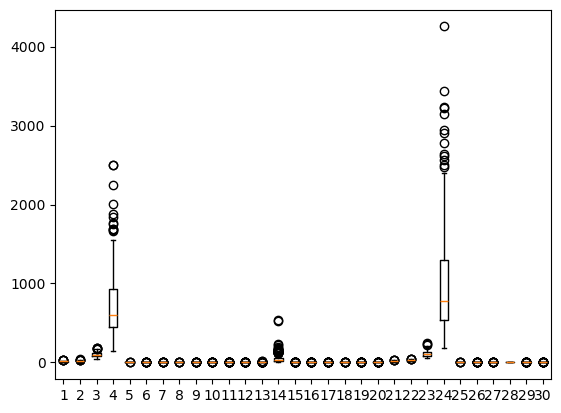

In [26]:
# --- START CODE

'''
# Plot a box plot for every feature, φαίνονται καλύτερα ξεχωριστά
for _ in cancer.feature_names:
    plt.boxplot(balanced_df[_])
    plt.show()
'''
# Όλα τα χαρακτηριστικά με boxplots μαζί
plt.boxplot(balanced_df.drop(columns='target'))
plt.show()

# --- END CODE

 Τι παρατηρείτε για τα χαρακτηριστικά;


> Σε κάποια χαρακτηριστικά υπάρχει μεγάλη διακύμανση των τιμών, είναι κατανεμημένα με διαφορετικές κλίμακες, και μερικά έχουν ευρύτερο εύρος τιμών από άλλα. Εμφανίζονται λίγα outliers και υπάρχουν χαρακτηριστικά  με μεγαλύτερη συγκέντρωση των τιμών κοντά στη διάμεσο σε σχέση με άλλα χαρακτηριστικά του ίδιου dataset.



7. Για τον έλεγχο συσχετίσεων μεταξύ των χαρακτηριστικών, χρησιμοποιήστε heatmap

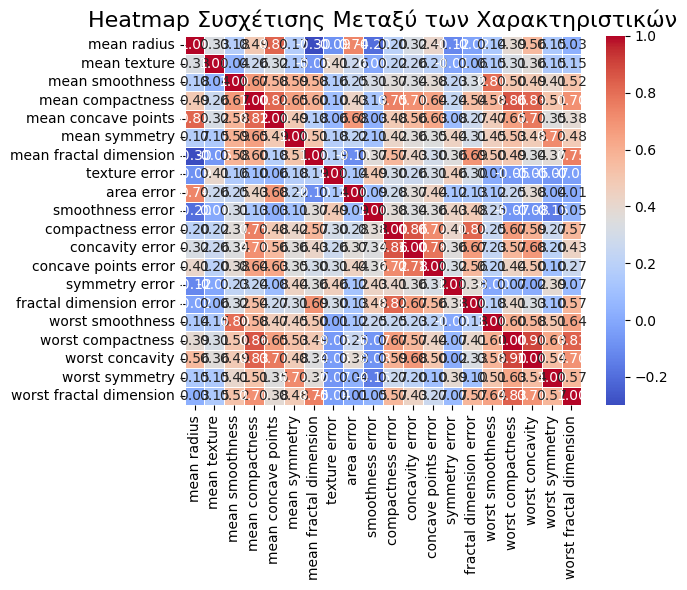

In [27]:
# --- START CODE
# Υπολογισμός του correlation matrix
# Αφαιρούμε τα χαρακτηριστικά με μεγάλη συσχέτιση (>0.9)
corr_matrix = balanced_df.drop(columns=['target','perimeter error','mean perimeter','worst perimeter','worst area','worst radius','radius error','mean area','mean concavity','worst concave points','worst texture']).corr()

# Δημιουργία Heatmap to correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ρυθμίσεις για τον τίτλο
plt.title('Heatmap Συσχέτισης Μεταξύ των Χαρακτηριστικών', fontsize=16)
plt.show()
# --- END CODE

Ποια χαρακτηριστικά έχουν μεγάλη συσχέτιση; Μπορείτε να τα διαχειριστείτε όπως θεωρείται ότι θα βοηθήσουν στην κατηγοριοποίηση (π.χ. συγχώνευση, αφαίρεση, κτλ)

#### Μετασχηματισμοί δεδομένων

8. Διαχωρίστε το σύνολο δεδομένων σε υποσύνολο χαρακτηριστικών **Χ** και σε υποσύνολο στόχων **y**

In [28]:
# --- START CODE
x = balanced_df.drop(columns=['target'])  # Διατηρούμε μόνο τα χαρακτηριστικά
y = balanced_df['target']  # Στόχος (κακοήθης ή καλοήθης)
# --- END CODE

9. Κανονικοποιήστε το dataset πριν το διαχωρισμό σε training και test sets

In [29]:
# --- START CODE
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# --- START CODE

Δικαιολογήστε την επιλογή του Scaler βάσει της μελέτης των χαρακτηριστικών του συνόλου δεδομένων(Βήμα 5β).

>  Tα χαρακτηριστικά έχουν διαφορετικές κλίμακες. Το StandardScaler μετατρέπει όλα τα χαρακτηριστικά ώστε να έχουν μέση τιμή 0 και τυπική απόκλιση (standard deviation) 1. Έτσι, το μοντέλο δεν θα επηρεάζεται από τις διαφορετικές κλίμακες μεταξύ χαρακτηριστικών. Με αυτόν τον τρόπο διασφαλίζουμε ότι όλα τα χαρακτηριστικά συμβάλλουν ισότιμα στην εκπαίδευση των μοντέλων.



#### Εκπαίδευση συνόλου δεδομένων

10. Διαχωρίστε το σύνολο δεδομένων σε Training & Test Sets


In [30]:
# --- START CODE
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=78)
# --- END CODE

11. Για την εκπαίδευση θα χρησιμοποιήσετε τα ακόλουθα 3 μοντέλα για κατηγοριοποίηση:
- [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)


α. Δοκιμάστε να εκπαιδεύσετε τα μοντέλα σας με δύο διαφορετικές τιμές για τις ακόλουθες παραμέτρους:
-  n_neighbors στο kNN,  
-  var_smoothing στο GaussianNB,
-  penalty στο Logistic Regression,

β.  Παρουσιάστε τα αποτελέσματα για το Accuracy, Precision, Recall, F1-score ανά κλάση και συνολικά καθώς και τον πίνακα
Confusion Matrix για όλες τις διαφορετικές τιμές στις παραμέτρους του κάθε μοντέλου.

In [31]:
# --- START CODE

# Λίστα για αποθήκευση των μετρικών
results = []

# α,β: Εκπαίδευση και Αξιολόγηση του k-Nearest Neighbors
k_values = [3, 5]
for k in k_values:
    # Initialize classifier:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier:
    knn.fit(X_train, y_train)

    # Make predictions with the classifier:
    pred = knn.predict(X_test)

    # print("Prediction ", pred)
    # print("Test set", y_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    accuracy = accuracy_score(y_test, pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average='weighted')
    results.append(["KNN", f"n_neighbors={k}", accuracy, precision, recall, f1])




# α,β: Εκπαίδευση και Αξιολόγηση του Naive Bayes
var_values = [1e-9, 1]
for var in var_values:
    # Initialize classifier:
    gnb = GaussianNB(var_smoothing=var)

    # Train the classifier:
    model = gnb.fit(X_train, y_train)

    # Make predictions with the classifier:
    predictive_labels = gnb.predict(X_test)

    # print("Prediction ", predictive_labels)
    # print("Test set", y_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictive_labels))
    accuracy = accuracy_score(y_test, predictive_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictive_labels, average='weighted')
    results.append(["Naive Bayes", f"var_smoothing={var}", accuracy, precision, recall, f1])




# α,β: Εκπαίδευση και Αξιολόγηση του Logistic Regression
penalty_values = [None, 'l2']
for penalty in penalty_values:
    # Initialize classifier:
    logr = LogisticRegression(penalty=penalty)

    # Train the classifier:
    logr.fit(X_train, y_train)

    # Make predictions with the classifier:
    PREDICTION = logr.predict(X_test)

    # print("Prediction ", PREDICTION)
    # print("Test set", y_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, PREDICTION))
    accuracy = accuracy_score(y_test, PREDICTION)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, PREDICTION, average='weighted')
    results.append(["Logistic Regression", f"penalty={penalty}", accuracy, precision, recall, f1])

# --- END CODE

Confusion Matrix:
 [[39  0]
 [ 4 42]]
Confusion Matrix:
 [[39  0]
 [ 3 43]]
Confusion Matrix:
 [[39  0]
 [ 2 44]]
Confusion Matrix:
 [[37  2]
 [ 0 46]]
Confusion Matrix:
 [[39  0]
 [ 3 43]]
Confusion Matrix:
 [[39  0]
 [ 2 44]]


12. Χρησιμοποιήστε ένα dataframe για να αποθηκεύσετε τις μετρικές αξιολόγησης για όλα τα μοντέλα.

In [32]:
# --- START CODE
metrics_df = pd.DataFrame(results, columns=["Model", "Parameters", "Accuracy", "Precision", "Recall", "F1-score"])
# --- END CODE

13. Να απεικονίσετε σε διαφορετικά διαγράμματα για όλα τα μοντέλα, τα εξής:
 - α. Oρθότητα
 - β. F1 score
 - γ. Precision
 - d. Recall


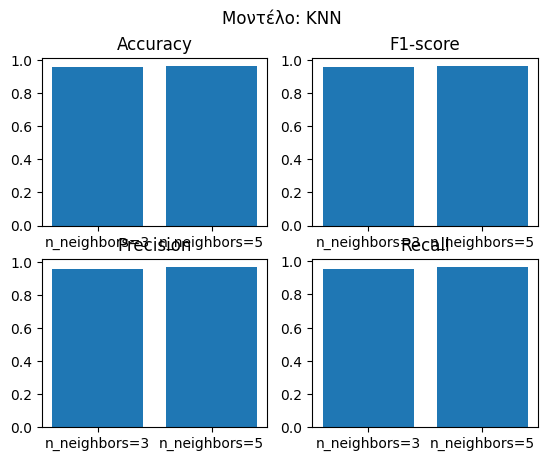

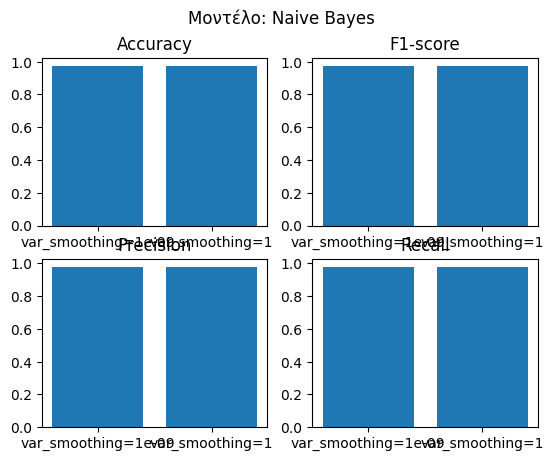

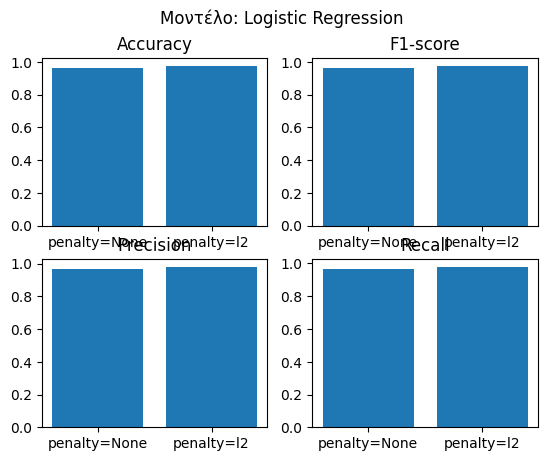



                 Model           Parameters  Accuracy  Precision    Recall  \
0                  KNN        n_neighbors=3  0.952941   0.957319  0.952941   
1                  KNN        n_neighbors=5  0.964706   0.967227  0.964706   
2          Naive Bayes  var_smoothing=1e-09  0.976471   0.977618  0.976471   
3          Naive Bayes      var_smoothing=1  0.976471   0.977451  0.976471   
4  Logistic Regression         penalty=None  0.964706   0.967227  0.964706   
5  Logistic Regression           penalty=l2  0.976471   0.977618  0.976471   

   F1-score  
0  0.953019  
1  0.964765  
2  0.976503  
3  0.976411  
4  0.964765  
5  0.976503  


In [33]:
# --- START CODE
models = ["KNN", "Naive Bayes", "Logistic Regression"]

for model in models:
    # Φιλτράρισμα των δεδομένων για το συγκεκριμένο μοντέλο
    model_df = metrics_df[metrics_df["Model"].str.contains(model)]

    figure, axis = plt.subplots(2, 2)
    figure.suptitle(f"Μοντέλο: {model}")
    # For Accuracy
    axis[0, 0].bar(model_df['Parameters'], model_df["Accuracy"])
    axis[0, 0].set_title("Accuracy")

    # For F1-Score
    axis[0, 1].bar(model_df['Parameters'], model_df["F1-score"])
    axis[0, 1].set_title("F1-score")

    # For Precision
    axis[1, 0].bar(model_df['Parameters'], model_df["Precision"])
    axis[1, 0].set_title("Precision")

    # For Recall
    axis[1, 1].bar(model_df['Parameters'], model_df["Recall"])
    axis[1, 1].set_title("Recall")

    plt.show()
    print(f"\n")

# Eμφάνισε το dataset με τα metrics
print(metrics_df)
# --- END CODE

Απαντήστε στις ακόλουθες ερωτήσεις:
1. Ποιο μοντέλο είχε τη μεγαλύτερη ορθότητα; Κατά τη γνώμη σας, γιατί;
2. Πώς επηρέασε η τιμή του k τα αποτελέσματα του k-NN;
3. Ο Naive Bayes είχε παρόμοια απόδοση με τα άλλα μοντέλα;
4. Ποιο μοντέλο είχε το υψηλότερη τιμή F1-score; Γιατί;
5. Ποιου μοντέλου η εκπαίδευση ήταν πιο αργή και ποιου πιο γρήγορη; Γιατί;
7. Από το confusion matrix για κάθε μοντέλο μπορείτε να διακρίνετε συγκεκριμένες δυσκολίες σε κάποια κατηγορία;
8. Αν αλλάζαμε την αναλογία train-test, πώς θα μπορούσε να επηρεαστεί η απόδοση των μοντέλων;
9. Υπάρχουν outliers ή χαρακτηριστικά που επηρέασαν την απόδοση κάποιου συγκεκριμένου μοντέλου;
10. Ποιο μοντέλο θα προτιμούσατε για αυτό το dataset και γιατί;


**Απαντήσεις**

1.1. Ποιο μοντέλο είχε τη μεγαλύτερη ορθότητα; Κατά τη γνώμη σας, γιατί;
Το μοντέλο με τη μεγαλύτερη ορθότητα (accuracy = 0.976471) ήταν το Naive Bayes (και με τις δύο τιμές παραμέτρων) και το Logistic Regression με penalty=l2. Η υψηλή απόδοση του Naive Bayes πιθανώς οφείλεται στο ότι τα χαρακτηριστικά στο dataset έχουν σχετικά χαμηλή συσχέτιση μεταξύ τους, κάτι που ταιριάζει στην υπόθεση ανεξαρτησίας που κάνει ο αλγόριθμος. Επιπλέον, ο αλγόριθμος είναι πολύ απλός και αποδοτικός για διαχωρίσιμα δεδομένα. Το Logistic Regression (με l2 regularization) πιθανόν αποδίδει εξίσου καλά λόγω της δυνατότητας του να μοντελοποιεί γραμμικά διαχωρίσιμα δεδομένα και να αποφύγει το overfitting.

2. Στον αλγόριθμος k-NN, για κάθε νέα περίπτωση αναζητούμε τους k κοντινότερους γείτονες και ταξινομούμε την νέα περίπτωση στην κλάση που πλειοψηφεί ανάμεσα στους k κοντινότερους γείτονες. Αυξάνοντας το k από 3 σε 5, παρατηρούμε βελτίωση στην απόδοση:

Accuracy: από 0.952941 → 0.964706

F1-score: από 0.953019 → 0.964765

Αυτό δείχνει ότι ένα μεγαλύτερο k οδηγεί σε πιο σταθερές προβλέψεις, καθώς μειώνει την επίδραση μεμονωμένων outliers. Ωστόσο, αν το k γίνει πολύ μεγάλο, μπορεί να χαθεί η τοπική πληροφορία.

3. Ο Naive Bayes είχε πολύ παρόμοια απόδοση με τα υπόλοιπα μοντέλα. Όλες οι τιμές accuracy, precision, recall και F1-score για το Naive Bayes είναι εξαιρετικά κοντά στις τιμές των άλλων μοντέλων.

4. Τα μοντέλα Naive Bayes και Logistic Regression (με var_smoothing=1e-09 και  penalty=l2 αντίστοιχα) έχουν την υψηλότερη τιμή F1-score (0.976503). Το Naive Bayes λειτουργεί πολύ καλά όταν οι μεταβλητές εισόδου είναι ανεξάρτητες. Το Logistic Regression είναι ένα ισχυρό μοντέλο που προσαρμόζεται καλά σε διαχωρίσιμα δεδομένα και, με την  παράμετρο l2, μπορεί να βελτιώσει τη γενίκευσή του αποφεύγοντας το overfitting.

5. Η εκπαίδευση του k-NN είναι πιο αργή καθώς για κάθε νέο δείγμα πρέπει να υπολογίσει την απόσταση από όλα τα άλλα k δείγματα για να κάνει την πρόβλεψη.Η πιο γρήγορη εκπαίδευση ήταν του Naive Bayes καθώς είναι ένα πιθανοτικό μοντέλο που απλά υπολογίζει στατιστικές τιμές.

6. Το k-NN έχει περισσότερα False Negatives (4 για k=3 και 3 για k=5), που σημαίνει ότι έχει μια μικρή τάση να ταξινομεί εσφαλμένα τις περιπτώσεις της κατηγορίας 1 ως 0. Αυτό μπορεί να συμβαίνει επειδή το k-NN βασίζεται σε τοπικούς γείτονες και μπορεί να επηρεάζεται από τοπικές πυκνότητες δεδομένων. Στο Naive Bayes με var_smoothing=1e-9, το μοντέλο είχε 2 FN, δηλαδή ταξινόμησε 2 περιπτώσεις της κατηγορίας 1 ως 0. Με var_smoothing=1, το FN μηδενίστηκε, αλλά εμφανίστηκαν 2 False Positives (FP), δηλαδή 2 δείγματα της κατηγορίας 0 ταξινομήθηκαν λάθος ως 1.Τέλος στο Logistic Regression με penalty=None, υπήρχαν 3 FN (λάθος ταξινόμηση κατηγορίας 1 ως 0). Με penalty=l2, ο αριθμός των FN μειώθηκε σε 2, δηλαδή το μοντέλο βελτιώθηκε ελαφρώς.

7. Η αλλαγή της αναλογίας train-test μπορεί να έχει επίδραση στην απόδοση των μοντέλων. Αν έχουμε περισσότερα δεδομένα στο train-set (π.χ., 90-10 αντί για 80-20), τα μοντέλα μπορεί να μάθουν καλύτερα τα δεδομένα (overfitting) και να βελτιώσουν την ακρίβεια τους στο train-set. Ωστόσο η απόδωση στο test-set μπορεί να ελλατωθεί λόγω overfitting στο train-test.

8. Το k-NN είναι το πιο ευαίσθητο μοντέλο στα outliers, ειδικά για μικρές τιμές του k. Το γεγονός ότι έχει ελαφρώς μικρότερη απόδωση από τα άλλα δύο μοντέλα ίσως υποδειλώνει την ύπαρξη λίγων outlier τιμών.

9. Θα προτιμούσαμε για αυτό το dataset Naive Bayes ή Logistic Regression (l2) και τα δύο πέτυχαν υψηλή ακρίβεια και F1-score. Το Naive Bayes είναι ταχύτερο και καλύτερο για δεδομένα που ακολουθούν περίπου κανονική κατανομή. Το Logistic Regression (L2) είναι πιο ανθεκτικό σε outliers και καλύτερο για υψηλής διάστασης δεδομένα.

...